# Recorrido Postorder en Árboles Binarios

El recorrido Postorder  (del tipo búsqueda en profundidad: Depth First Search o DFS) es uno de los tres principales recorridos de árboles binarios y tiene una importancia crucial en diversas aplicaciones informáticas. Este tipo de recorrido asegura que todos los nodos de un árbol se visitan de una manera muy específica, siguiendo el orden: primero el subárbol izquierdo, luego el subárbol derecho, y finalmente el nodo actual.

- **Concepto de Recorrido Postorder:**
  - Recorre el subárbol izquierdo en Postorder.
  - Recorre el subárbol derecho en Postorder.
  - Visita el nodo actual.

- **Aplicaciones del Recorrido Postorder:**
  - Se utiliza en la evaluación de expresiones matemáticas representadas en forma de árbol.
  - Importante en operaciones de eliminación o liberación de recursos en estructuras de datos de árbol, asegurando que los recursos de los hijos se liberen antes que los del nodo padre.
  - Utilizado en algoritmos de backtracking, donde se necesitan explorar las soluciones de los hijos antes de resolver el problema en el nodo actual.

- **Implementación en Python:**
  - La implementación de Postorder se realiza típicamente a través de una función recursiva que primero visita los subárboles izquierdo y derecho, y luego el nodo en sí.

## Implementación en Python

Aquí te muestro cómo implementar este método en la clase [`BinaryTree`](src/BinaryTree.py):  

In [1]:
# Código utilitario
from src.visualization import visualize_bt
from src.BinaryTree import BinaryTree

In [2]:
def postorder_traversal(self, node=None):
    """
    Realiza el recorrido en postorden del árbol binario o de un subárbol.

    El recorrido comienza desde el nodo dado como argumento. Si no se
    proporciona, el recorrido comienza desde la raíz del árbol.

    Parámetros:
        node: Nodo de la clase BinaryTree desde donde iniciar el recorrido
        (opcional).

    Retorna:
        Una lista con los datos de los nodos visitados en el orden del recorrido
        en postorden.
    """
    # Inicia desde la raíz si no se proporciona un nodo específico.
    if node is None:
        node = self.root

    # Lista para almacenar el recorrido.
    result = []

    # Función auxiliar para realizar el recorrido en postorden de forma
    # recursiva.
    def _postorder(node):
        """
        Función auxiliar recursiva para ejecutar el recorrido en postorden sobre
        el árbol.

        Se llama a sí misma primero en el hijo izquierdo y luego en el hijo
        derecho del nodo actual si existen, agregando el dato del nodo actual al
        resultado después de visitar ambos hijos.

        Parámetros:
            node: Nodo actual que está siendo visitado por la función.
        """
        if node:
            # Recursividad en el subárbol izquierdo.
            _postorder(node.left)
            # Recursividad en el subárbol derecho.
            _postorder(node.right)
            # Agrega el dato del nodo actual al resultado.
            result.append(node.data)

    # Llamada inicial a la función auxiliar para iniciar el recorrido en postorden.
    _postorder(node)
    # Devuelve la lista resultante con el recorrido postorden.
    return result

# Extender la clase BinaryTree con el nuevo método postorder_traversal.
BinaryTree.postorder_traversal = postorder_traversal

## Pruebas de Recorrido Postorder

Primero, importamos las estructuras necesarias y extendemos nuestra clase `BinaryTree` para incluir el recorrido Postorder:

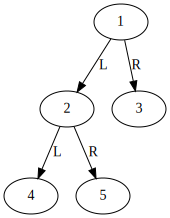

In [3]:
# Creación del árbol y aplicación del recorrido Preorder.
bt = BinaryTree()
for key in [1, 2, 3, 4, 5]:  # Inserta nodos en el árbol.
    bt.insert(key)

# Visualizar el árbol
dot = visualize_bt(bt)
dot

In [4]:
# Aplica el recorrido Postorder y almacena el resultado.
postorder_result = bt.postorder_traversal()

# Define el resultado esperado del recorrido Postorder del árbol dado.
# Nota: Deberás actualizar este arreglo según el árbol específico y el orden esperado.
expected_result = [4, 5, 2, 3, 1]

# Realiza la comprobación.
print("Prueba de Recorrido Postorder:")
print("Resultado obtenido:", postorder_result)
print("Resultado esperado:", expected_result)
assert postorder_result == expected_result, "El recorrido Postorder no coincide con el esperado."
print("La prueba del recorrido Postorder se ha completado con éxito.")


Prueba de Recorrido Postorder:
Resultado obtenido: [4, 5, 2, 3, 1]
Resultado esperado: [4, 5, 2, 3, 1]
La prueba del recorrido Postorder se ha completado con éxito.



## Complejidad del Algoritmo

- **Complejidad de Tiempo:** O(N) - Siendo N el número de nodos del árbol, cada nodo se visita exactamente una vez, lo que resulta en una complejidad temporal lineal con respecto al tamaño del árbol.
  
- **Complejidad de Espacio:** O(N) - En el peor de los casos, la complejidad del espacio también es lineal. Esto ocurre en el caso de un árbol completamente desbalanceado, donde la pila de llamadas recursivas se vuelve tan grande como el número de nodos del árbol.

## Ejercicios Prácticos

1. Implemente el recorrido Postorder de manera iterativa.
2. Escriba una función que utilice el recorrido Postorder para contar el número total de nodos en un árbol binario.
3. Implemente una función que utilice el recorrido Postorder para sumar todos los valores de los nodos en un árbol binario que contenga enteros.
4. Utilice el recorrido Postorder para identificar si dos árboles binarios son estructuralmente idénticos.

## Soluciones a los Ejercicios

1. **Implementación iterativa del recorrido Postorder:**

In [5]:
def postorder_traversal_iterative(self):
    """
    Realiza el recorrido Postorder de manera iterativa.

    Retorna:
        Una lista con los datos de los nodos visitados en el orden del recorrido Postorder.
    """
    result = []
    if not self.root:
        return result

    stack = []
    current = self.root
    while stack or current:
        if current:
            stack.append(current)
            current = current.left
        else:
            temp = stack[-1].right
            if not temp:
                temp = stack.pop()
                result.append(temp.data)
                while stack and temp == stack[-1].right:
                    temp = stack.pop()
                    result.append(temp.data)
            else:
                current = temp
    return result

2. **Función para contar el número total de nodos usando Postorder:**   

In [6]:
def count_nodes_postorder(self, node=None):
    """
    Cuenta el número de nodos en el árbol utilizando el recorrido Postorder.

    Parámetros:
        node: Nodo actual a contar (inicialmente la raíz).

    Retorna:
        El número total de nodos en el árbol.
    """
    if node is None:
        node = self.root

    count = 0
    if node:
        count += self.count_nodes_postorder(node.left)
        count += self.count_nodes_postorder(node.right)
        count += 1  # Contar el nodo actual.

    return count

3. **Suma de los valores de los nodos con Postorder:**

In [7]:
def sum_nodes_postorder(self, node=None):
    """
    Suma los valores de todos los nodos en un árbol binario de enteros
    utilizando el recorrido Postorder.

    Parámetros:
        node: Nodo actual para sumar (inicialmente la raíz).

    Retorna:
        La suma de los valores de todos los nodos.
    """
    if node is None:
        node = self.root

    total = 0
    if node:
        total += self.sum_nodes_postorder(node.left)
        total += self.sum_nodes_postorder(node.right)
        total += node.data  # Sumar el valor del nodo actual.

    return total

4. **Comparación estructural de dos árboles con Postorder:**

In [8]:
def are_structurally_identical_postorder(self, root1, root2):
    """
    Determina si dos árboles son estructuralmente idénticos utilizando
    el recorrido Postorder.

    Parámetros:
        root1: La raíz del primer árbol.
        root2: La raíz del segundo árbol.

    Retorna:
        True si los árboles son estructuralmente idénticos, False de lo contrario.
    """
    if not root1 and not root2:
        return True
    if root1 and root2:
        return (self.are_structurally_identical_postorder(root1.left, root2.left) and
                self.are_structurally_identical_postorder(root1.right, root2.right))
    return False

En cada una de estas funciones, se utiliza el recorrido Postorder para realizar la tarea solicitada, demostrando la versatilidad y utilidad de este recorrido en diferentes contextos y aplicaciones.